## Cargamos el dataset

In [3]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_3_final.csv", sep=";")

In [5]:
df_entrada.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627803 non-null  int64  
 1   NIVEL                           627803 non-null  int64  
 2   NIVEL_GOBIERNO                  627803 non-null  object 
 3   DPTO                            627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627803 non-null  object 
 5   FUNCION                         627803 non-null  int64  
 6   FUNCION_NOMBRE                  627803 non-null  object 
 7   PIA                             627803 non-null  int64  
 8   PIM                             627803 non-null  int64  
 9   DEVENGADO                       627803 non-null  float64
 10  IP                              627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627803 non-null  int64  
 12  NRO_PRESIDENTES_

In [65]:
df_entrada.AVANCE.value_counts()

AVANCE
 1.0000    155045
 0.0000    112794
 0.9999     10722
 0.9998      3701
 0.5000      2436
            ...  
-0.9171         1
 1.0087         1
 1.0010         1
 1.0003         1
 1.0063         1
Name: count, Length: 10022, dtype: int64

## EXPLORACION

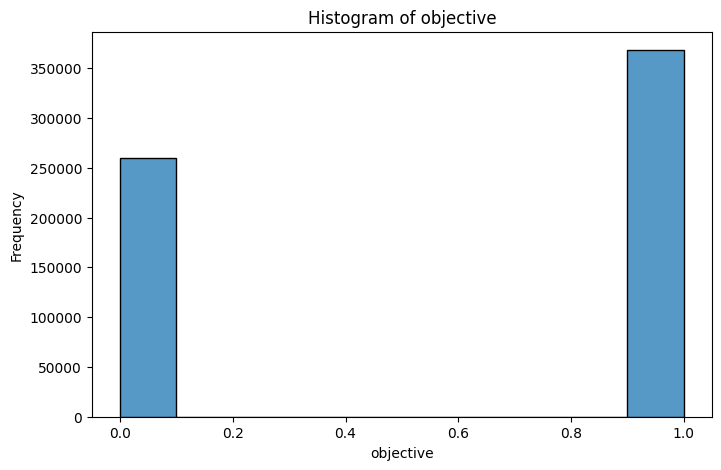

In [50]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada['CLASE'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of CLASE')
plt.show()

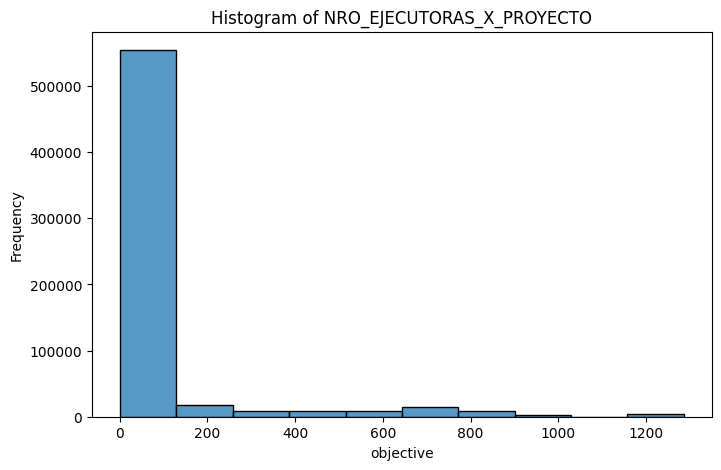

In [52]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada['NRO_EJECUTORAS_X_PROYECTO'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of NRO_EJECUTORAS_X_PROYECTO')
plt.show()

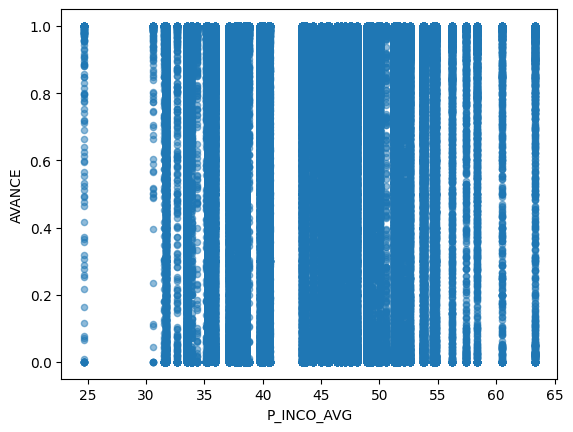

In [6]:
df_entrada.plot.scatter(x="P_INCO_AVG", y="AVANCE", alpha=0.5)
plt.show()


## DROP

In [29]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            #,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            ]
               
df_entrada.drop(col_to_drop, axis='columns', inplace=True)

In [32]:
df_entrada

,NIVEL,DPTO,FUNCION,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,TIPO_GOBIERNO_NACIONAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,CLASE
0,2,1,15,79983,34.90,1,0,0,0,Centro derecha,169,1.36,6,8,0.629,51.47,36.305761,1,1
1,2,1,15,57539,25.80,1,1,1,0,Izquierda,215,5.60,6,8,0.629,51.47,36.305761,1,1
2,2,1,15,160000,39.70,2,0,0,0,Centro izquierda,212,3.23,6,8,0.629,51.47,36.305761,1,1
3,2,1,15,41528,36.10,3,1,0,0,Centro derecha,197,1.97,6,8,0.629,51.47,36.305761,1,1
4,2,1,15,914962,30.50,1,0,1,0,Centro derecha,184,1.90,6,8,0.629,51.47,36.305761,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627865,1,15,2,800000,14.20,1,0,1,0,Centro izquierda,211,4.40,6,10,0.635,43.52,41.130490,2,1
627866,1,15,2,2529872,24.90,2,1,0,1,Izquierda,221,8.56,4,4,0.635,43.52,41.130490,1,0
627867,1,15,2,2118508,14.35,1,0,1,0,Centro derecha,184,1.90,4,4,0.635,43.52,41.130490,1,0
627868,1,15,2,2118508,26.55,3,1,0,0,Centro derecha,197,1.97,4,4,0.635,43.52,41.130490,1,0


## ONE HOT

In [33]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION']
df_one_hot = pd.get_dummies(df_entrada, columns=columns_to_one_hot_encode, dtype=int)

In [34]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [67]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627870 entries, 0 to 627869
Data columns (total 71 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PIM                             627870 non-null  int64  
 1   IP                              627870 non-null  float64
 2   NRO_PRESIDENTES_X_ANO           627870 non-null  int64  
 3   PANDEMIA                        627870 non-null  int64  
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL  627870 non-null  int64  
 5   ELECCION_REGIONAL_LOCAL         627870 non-null  int64  
 6   NRO_CONFLICTO_SOCIAL_X_ANO      627870 non-null  int64  
 7   INFLACION_ANUAL                 627870 non-null  float64
 8   PROYECTO_EDAD_NETA              627870 non-null  int64  
 9   PROYECTO_EDAD_BRUTA             627870 non-null  int64  
 10  IGEIP_EJECUCION                 627870 non-null  float64
 11  P_INCO_AVG                      627870 non-null  float64
 12  NEJE_PUNTAJEIRI 

## MODELING

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
df_one_hot_scaled = scaler.fit_transform(df_one_hot)
#df_one_hot_scaled = pd.DataFrame(scaler.fit_transform(df_one_hot), columns=df_one_hot.columns)
df_one_hot_scaled = pd.DataFrame(df_one_hot_scaled, columns=df_one_hot.columns)
df_one_hot_scaled.head(4)

,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,...,FUNCION_16,FUNCION_17,FUNCION_18,FUNCION_19,FUNCION_20,FUNCION_21,FUNCION_22,FUNCION_23,FUNCION_24,FUNCION_25
0,0.000043,0.612053,0.0,0.0,0.0,0.0,0.147541,0.000000,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000031,0.440678,0.0,1.0,1.0,0.0,0.901639,0.588889,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000086,0.702448,0.5,0.0,0.0,0.0,0.852459,0.259722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000022,0.634652,1.0,1.0,0.0,0.0,0.606557,0.084722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_one_hot_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627870 entries, 0 to 627869
Data columns (total 71 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PIM                             627870 non-null  float64
 1   IP                              627870 non-null  float64
 2   NRO_PRESIDENTES_X_ANO           627870 non-null  float64
 3   PANDEMIA                        627870 non-null  float64
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL  627870 non-null  float64
 5   ELECCION_REGIONAL_LOCAL         627870 non-null  float64
 6   NRO_CONFLICTO_SOCIAL_X_ANO      627870 non-null  float64
 7   INFLACION_ANUAL                 627870 non-null  float64
 8   PROYECTO_EDAD_NETA              627870 non-null  float64
 9   PROYECTO_EDAD_BRUTA             627870 non-null  float64
 10  IGEIP_EJECUCION                 627870 non-null  float64
 11  P_INCO_AVG                      627870 non-null  float64
 12  NEJE_PUNTAJEIRI 

In [39]:
X = df_one_hot_scaled.drop(['CLASE'], axis=1)
y = df_one_hot_scaled['CLASE'].values

In [31]:
df_entrada = df_entrada.drop(df_entrada.columns[0], axis=1)

In [40]:
df_one_hot_scaled.head(4)

,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,...,FUNCION_16,FUNCION_17,FUNCION_18,FUNCION_19,FUNCION_20,FUNCION_21,FUNCION_22,FUNCION_23,FUNCION_24,FUNCION_25
0,0.000043,0.612053,0.0,0.0,0.0,0.0,0.147541,0.000000,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000031,0.440678,0.0,1.0,1.0,0.0,0.901639,0.588889,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000086,0.702448,0.5,0.0,0.0,0.0,0.852459,0.259722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000022,0.634652,1.0,1.0,0.0,0.0,0.606557,0.084722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439509 entries, 164029 to 121958
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PIM                             439509 non-null  float64
 1   IP                              439509 non-null  float64
 2   NRO_PRESIDENTES_X_ANO           439509 non-null  float64
 3   PANDEMIA                        439509 non-null  float64
 4   CAMBIO_GOBIERNO_REGIONAL_LOCAL  439509 non-null  float64
 5   ELECCION_REGIONAL_LOCAL         439509 non-null  float64
 6   NRO_CONFLICTO_SOCIAL_X_ANO      439509 non-null  float64
 7   INFLACION_ANUAL                 439509 non-null  float64
 8   PROYECTO_EDAD_NETA              439509 non-null  float64
 9   PROYECTO_EDAD_BRUTA             439509 non-null  float64
 10  IGEIP_EJECUCION                 439509 non-null  float64
 11  P_INCO_AVG                      439509 non-null  float64
 12  NEJE_PUNTAJEIRI 

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [44]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.6081460599593335


## RANDOM FOREST

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [46]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.6712
Training time: 22.85 seconds
Prediction time: 1.56 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.56      0.59     78243
         1.0       0.71      0.75      0.73    110118

    accuracy                           0.67    188361
   macro avg       0.66      0.66      0.66    188361
weighted avg       0.67      0.67      0.67    188361


Confusion Matrix:
[[43856 34387]
 [27547 82571]]


In [48]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.6864
Training time: 224.36 seconds
Prediction time: 14.50 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.58     78243
         1.0       0.70      0.81      0.75    110118

    accuracy                           0.69    188361
   macro avg       0.68      0.66      0.66    188361
weighted avg       0.68      0.69      0.68    188361


Confusion Matrix:
[[40227 38016]
 [21049 89069]]


# StandardScaler

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)